In [1]:
# This assignment is adapted and accomplished with the tutorial "Your First Machine Learning Project in R Step-By-Step" by Jason Brownlee.

## https://machinelearningmastery.com/machine-learning-in-r-step-by-step/Links to an external site.

In [ ]:
#caret, kernlab, randomForest, and ellipse in environemnt 
#install.packages("caret")

In [1]:
#library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [4]:
# define the filename
#filename <- "iris.csv"
# load the CSV file from the local directory
#dataset <- read.csv(filename, header=FALSE)
# bring in iris from URL not from .csv
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")
dataset$Species = as.factor(dataset$Species)

In [5]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [6]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [7]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [8]:
Sepal.Length Sepal.Width Petal.Length Petal.Width Species 
 "numeric" "numeric" "numeric" "numeric" "factor"

ERROR: Error in parse(text = x, srcfile = src): <text>:1:14: unexpected symbol
1: Sepal.Length Sepal.Width
                 ^


In [9]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [10]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [11]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [12]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.00   Min.   :1.100   Min.   :0.100   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.300   versicolor:40  
 Median :5.800   Median :3.00   Median :4.350   Median :1.300   virginica :40  
 Mean   :5.838   Mean   :3.06   Mean   :3.766   Mean   :1.202                  
 3rd Qu.:6.400   3rd Qu.:3.40   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.10   Max.   :6.700   Max.   :2.500                  

In [13]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

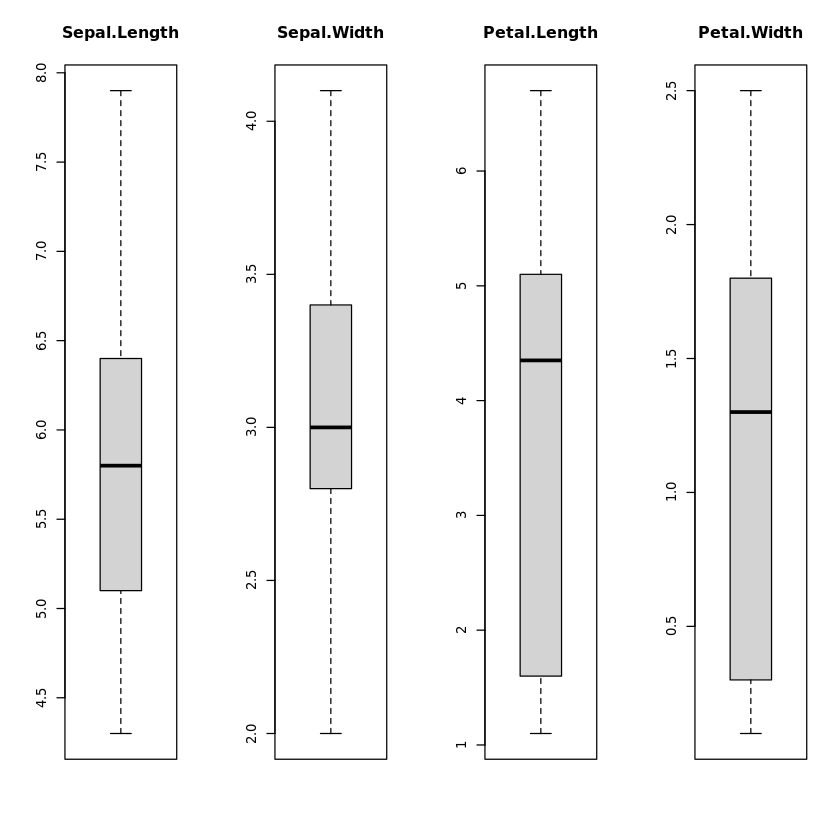

In [14]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

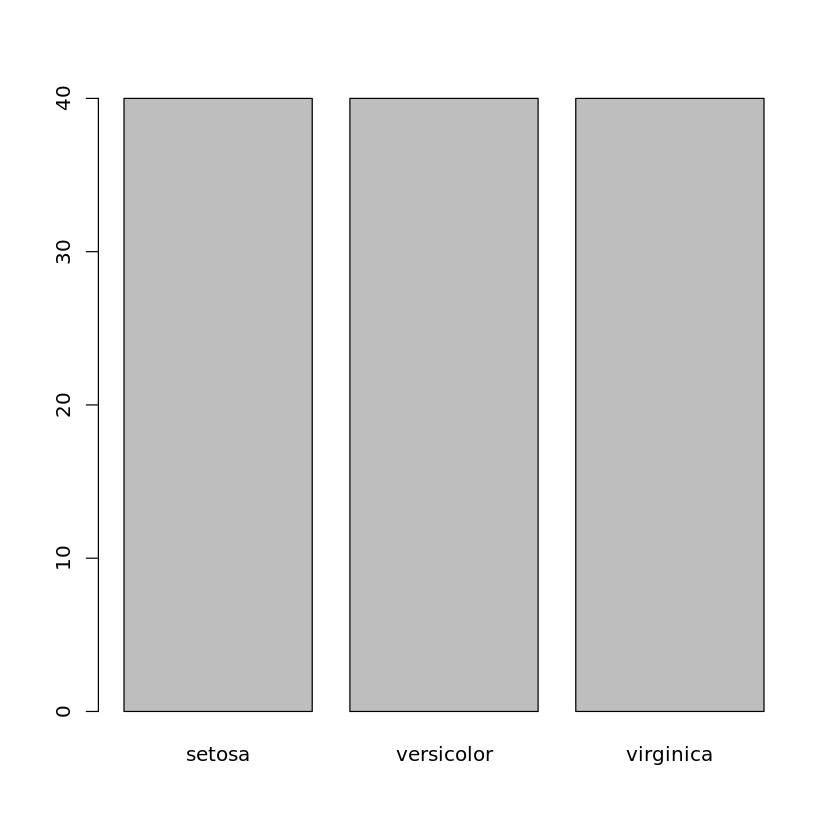

In [15]:
# barplot for class breakdown
plot(y)

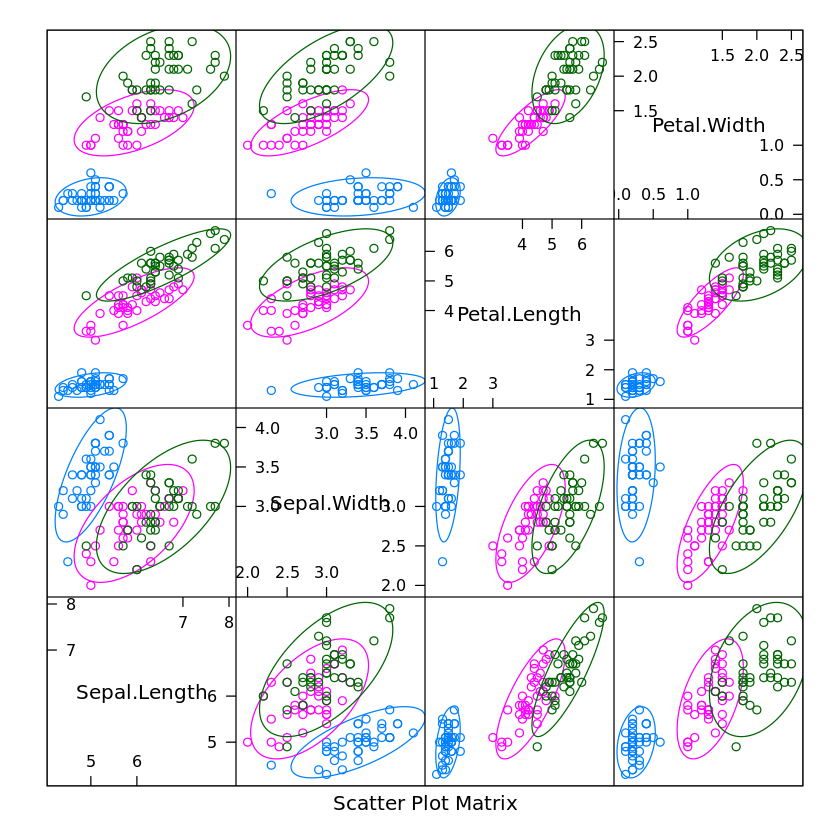

In [16]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

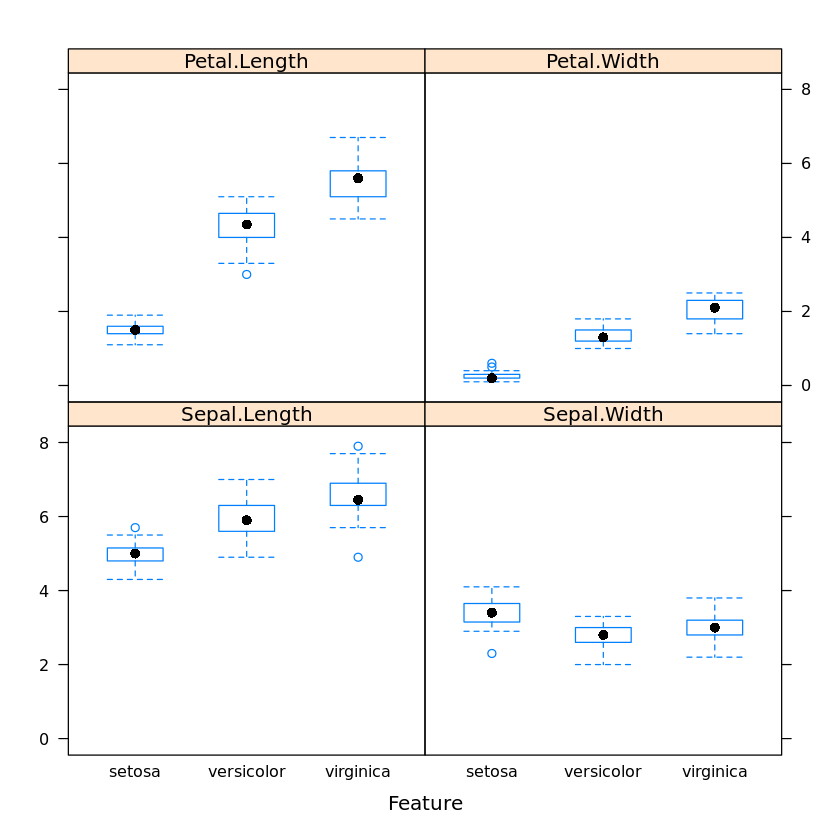

In [17]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

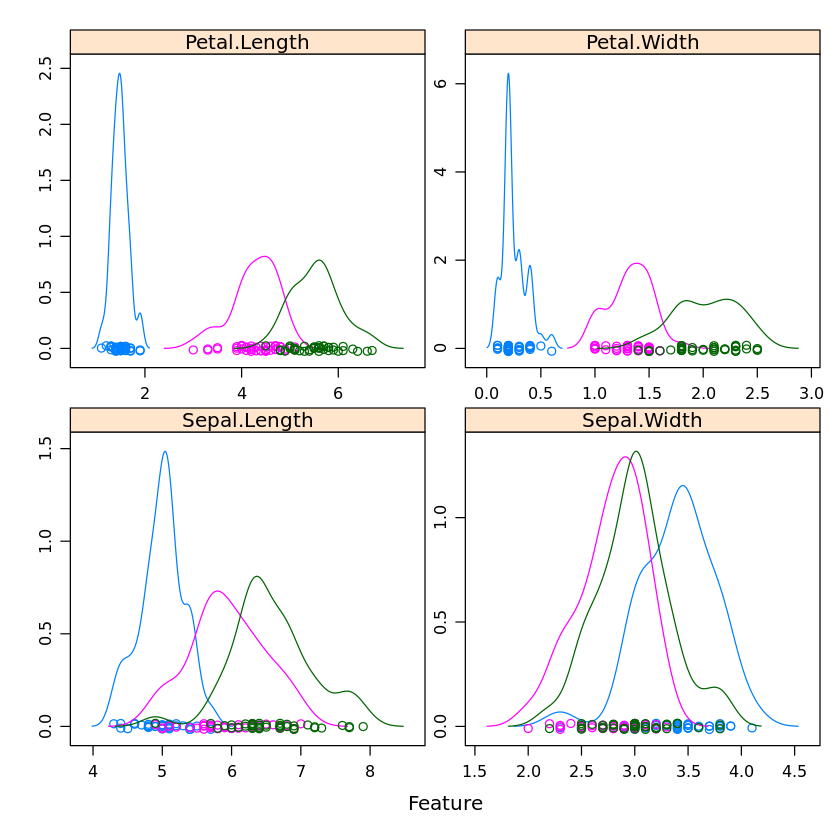

In [18]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [19]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [20]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [21]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.8333333 1.0000000 1.0000000 0.9750000 1.0000000    1    0
cart 0.8333333 0.9166667 0.9166667 0.9166667 0.9166667    1    0
knn  0.8333333 1.0000000 1.0000000 0.9750000 1.0000000    1    0
svm  0.8333333 0.9166667 1.0000000 0.9500000 1.0000000    1    0
rf   0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0

Kappa 
     Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.75 1.00000  1.000 0.9625   1.000    1    0
cart 0.75 0.87500  0.875 0.8750   0.875    1    0
knn  0.75 1.00000  1.000 0.9625   1.000    1    0
svm  0.75 0.87500  1.000 0.9250   1.000    1    0
rf   0.75 0.90625  1.000 0.9500   1.000    1    0


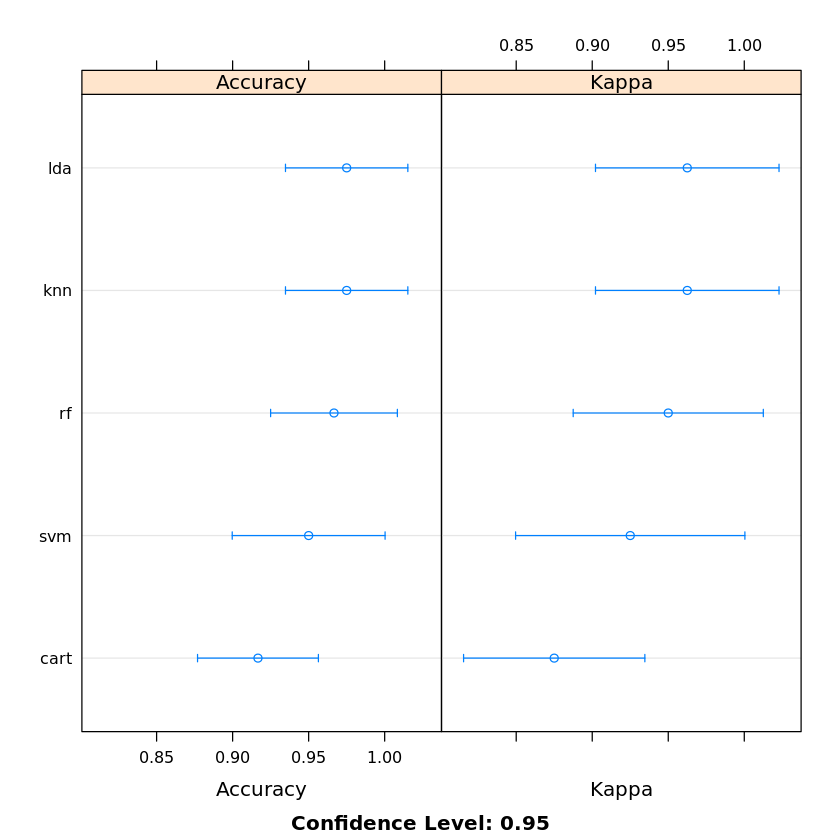

In [22]:
# compare accuracy of models
dotplot(results)